Version 3

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME
from matplotlib import  colors
from evaluations.scatter import fancy_scatter_plot
from products.plot_settings import PRODUCT_PLOT_NAMES

analysis_type='scatter'
analysis_folder = f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/{analysis_type}'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = nasa_l3_metrics_ds.where(nasa_l3_metrics_ds>0,drop=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = nasa_pseudo_l3_metrics_ds.where(nasa_pseudo_l3_metrics_ds>0,drop=True)
analyses_dict_v3 = {METEOFRANCE_VAR_NAME: mf_metrics_ds,  NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds,NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

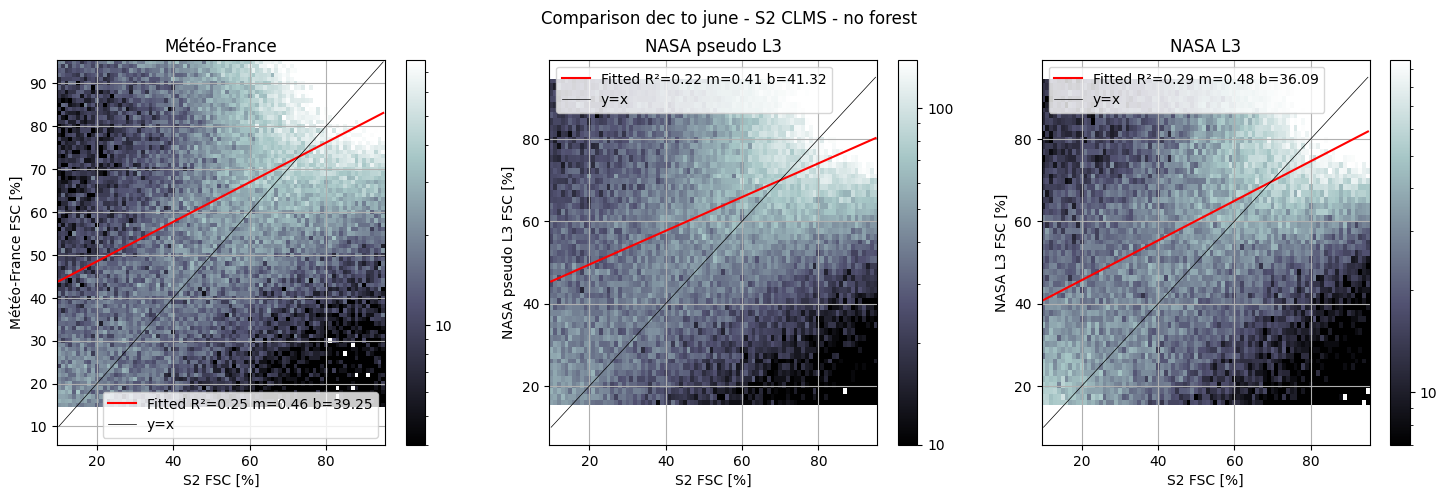

In [11]:


fig, ax = plt.subplots(1,len(analyses_dict_v3), figsize=(6*len(analyses_dict_v3), 5))
fig.suptitle('Comparison dec to june - S2 CLMS - no forest ')



for i, (k,v) in enumerate(analyses_dict_v3.items()):
    reduced_v = v.sel(ref_bins=slice(10,95),forest_mask=[0],test_bins=slice(15,95), time=slice('2023-12','2024-06')).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
    # reduced_v = reduced_v.where(reduced_v>10,0)
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")
    


Version 4

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME, PRODUCT_PLOT_NAMES
from matplotlib import  colors
from evaluations.scatter import fancy_scatter_plot

analysis_type='scatter'
analysis_folder = f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/{analysis_type}'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_meteofrance_l3_FSC_vs_s2_theia_FSC_375m.nc", decode_cf=True)
mf_metrics_ds = mf_metrics_ds.assign_coords({'forest_mask': ['no_forest', 'forest']})
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_l3_FSC_vs_s2_theia_FSC_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = nasa_l3_metrics_ds.where(nasa_l3_metrics_ds>0, drop=True)
nasa_l3_metrics_ds = nasa_l3_metrics_ds.assign_coords({'forest_mask_bins': ['no_forest', 'forest']}).rename({'forest_mask_bins': 'forest_mask'})
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_pseudo_l3_FSC_vs_s2_theia_FSC_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = nasa_pseudo_l3_metrics_ds.where(nasa_pseudo_l3_metrics_ds>0, drop=True)
nasa_pseudo_l3_metrics_ds = nasa_pseudo_l3_metrics_ds.assign_coords({'forest_mask_bins': ['no_forest', 'forest']}).rename({'forest_mask_bins': 'forest_mask'})
analyses_dict_v4 = {METEOFRANCE_VAR_NAME: mf_metrics_ds,  NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds,NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

[[0.6016271]]
[[0.55089732]]
[[0.65361966]]


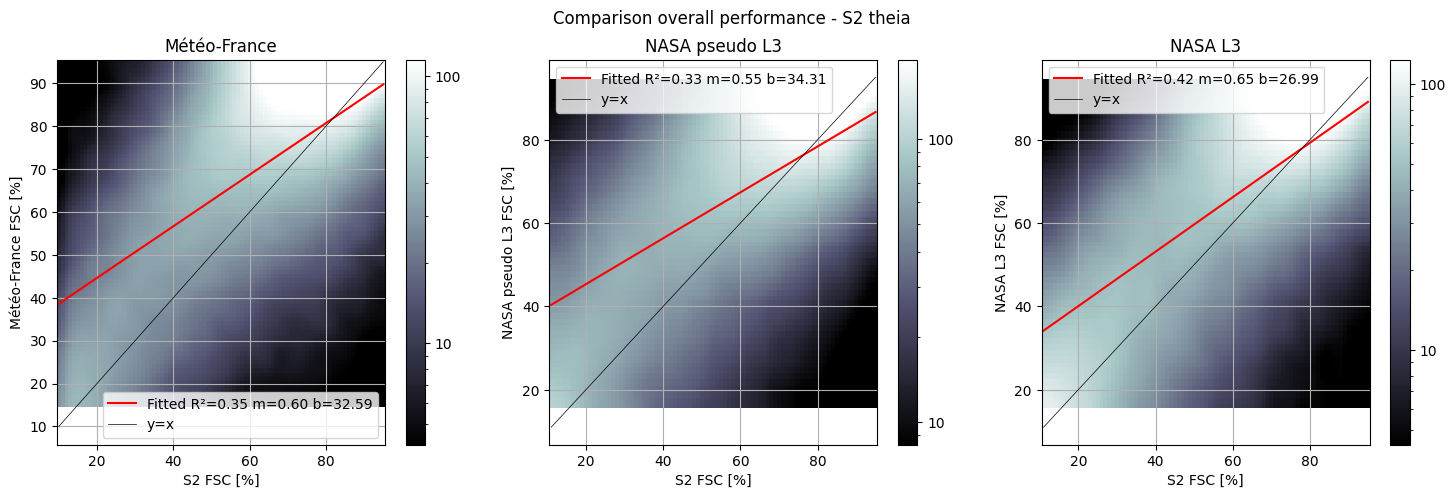

In [ ]:
fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Comparison overall performance - S2 theia')

# selection_dict = {k: v.sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict_v3.items()}
selection_dict = analyses_dict_v4
for i, (k,v) in enumerate(selection_dict.items()):
    reduced_v = v.sel(ref_bins=slice(10,95),forest_mask=['no_forest'],test_bins=slice(15,95)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")

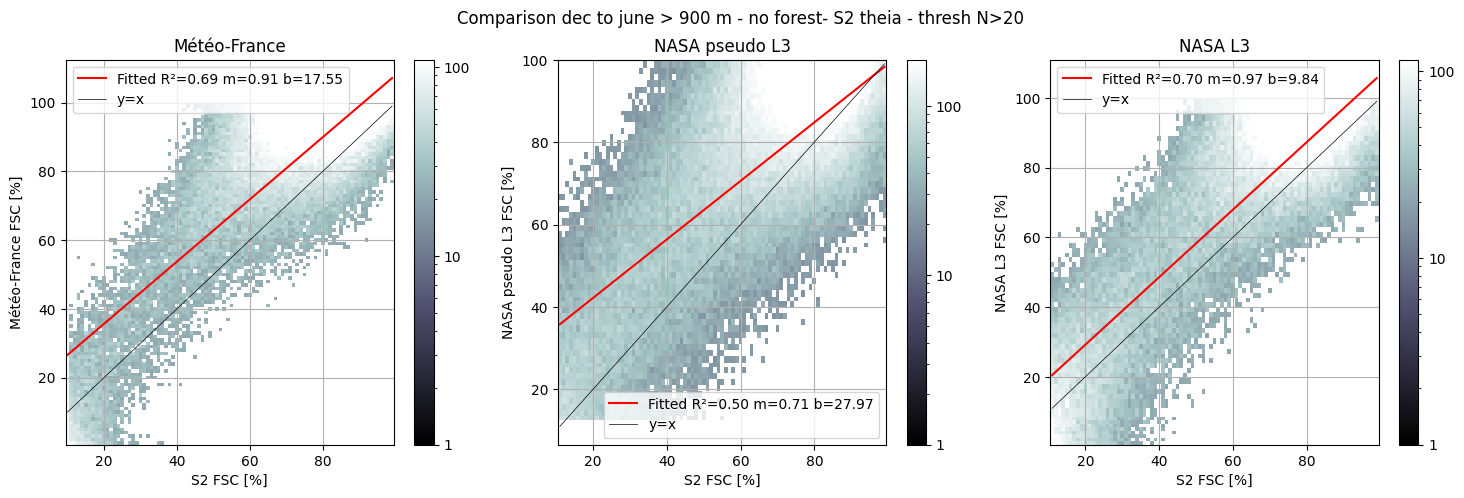

In [2]:
fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Comparison dec to june > 900 m - no forest- S2 theia - thresh N>20')

selection_dict = {k: v.sel(altitude_bins=slice(900,None)).sel(time=slice('2023-12', '2024-06')) for k,v in analyses_dict_v4.items()}
for i, (k,v) in enumerate(selection_dict.items()):
    reduced_v = v.sel(ref_bins=slice(10,99),forest_mask=['no_forest'],test_bins=slice(1,99)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    reduced_v = reduced_v.where(reduced_v>20,0)
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")

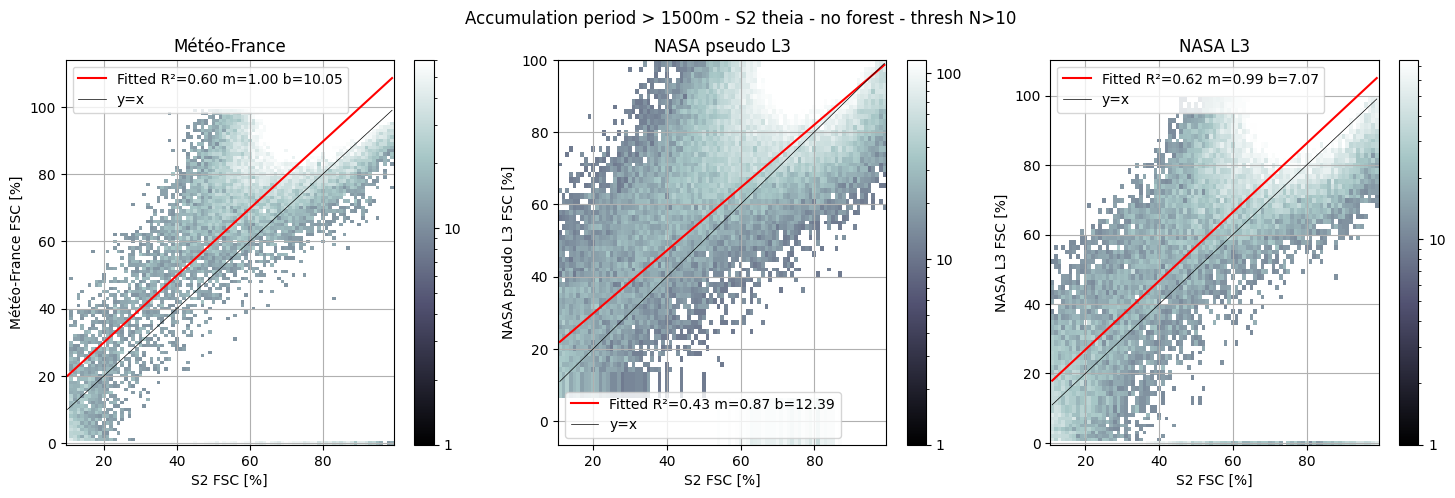

In [33]:
fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Accumulation period > 1500m - S2 theia - no forest - thresh N>10')

# selection_dict = {k: v.sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict_v3.items()}
selection_dict = {k: v.sel(time=slice('2023-12','2024-02')).sel(altitude_bins=slice(1500,None))  for k,v in analyses_dict_v4.items()}
for i, (k,v) in enumerate(selection_dict.items()):
    if k=='meteofrance_l3':
        min_test=0
    else:
        min_ref=15
    reduced_v = v.sel(ref_bins=slice(10,99),forest_mask=['no_forest'],test_bins=slice(min_test,99)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    reduced_v = reduced_v.where(reduced_v>10,0)
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")
    

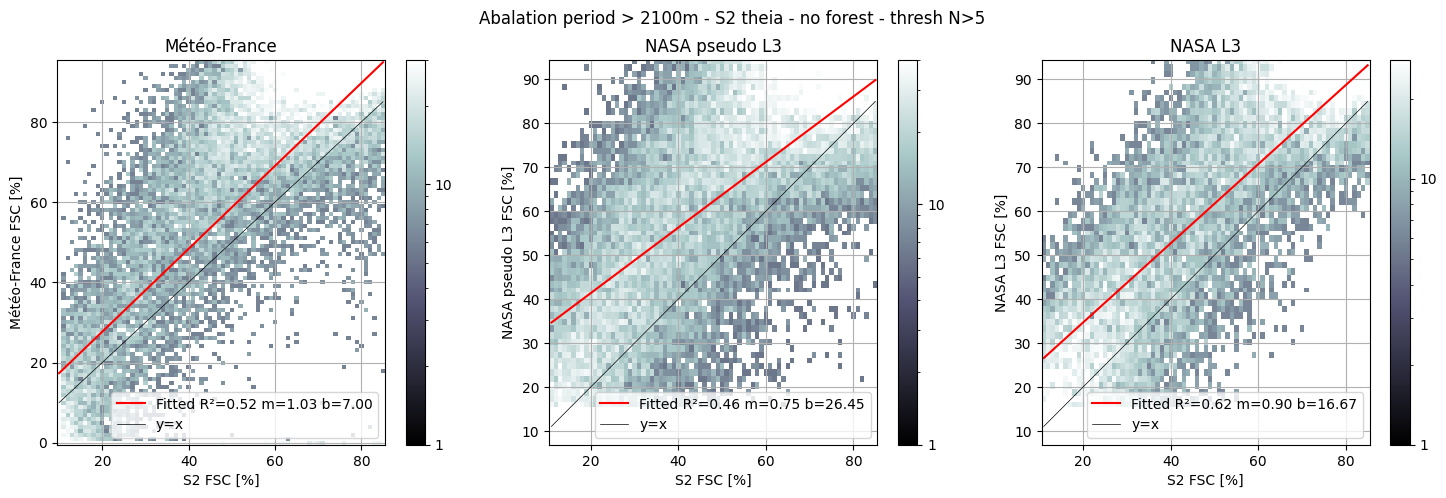

In [36]:
fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Abalation period > 2100m - S2 theia - no forest - thresh N>5')

# selection_dict = {k: v.sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict_v3.items()}
selection_dict = {k: v.sel(time=slice('2024-03','2024-07')).sel(altitude_bins=slice(2100,None))  for k,v in analyses_dict_v4.items()}
for i, (k,v) in enumerate(selection_dict.items()):
    if k=='meteofrance_l3':
        min_test=0
    else:
        min_test=15
    reduced_v = v.sel(ref_bins=slice(10,85),forest_mask=['no_forest'],test_bins=slice(min_test,95)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    reduced_v = reduced_v.where(reduced_v>5,0)
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")

Cross comparison NASA Météo-France

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression




scatter_nasa_l3_ndsi_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_nasa_vs_meteofrance_l3_375m.nc", decode_cf=True).sel(altitude_bins=slice(900,None)).sel(time=slice('2023-12', '2024-06'))
scatter_nasa_l3_ndsi_ds = scatter_nasa_l3_ndsi_ds.where(scatter_nasa_l3_ndsi_ds>0, drop=True)
scatter_nasa_l3_ndsi_ds = scatter_nasa_l3_ndsi_ds.assign_coords({'forest_mask_bins': ['no_forest', 'forest']})

Text(0, 0.5, 'MF FSC [%]')

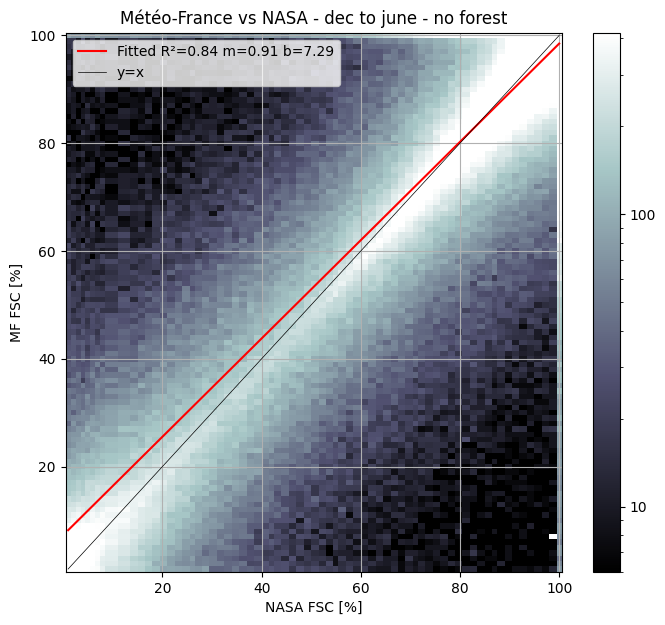

In [29]:
fig, ax = plt.subplots(figsize=(8, 7))
reduced_v = scatter_nasa_l3_ndsi_ds.sel(ref_bins=slice(1,100),forest_mask_bins=['no_forest'],test_bins=slice(1,100), time=slice('2023-12','2024-06'), altitude_bins=slice(900, None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
# reduced_v = reduced_v.where(reduced_v>5,0)
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax,figure=fig,gaussian_window_size=0)
ax.set_title('Météo-France vs NASA - dec to june - no forest')
ax.set_xlabel("NASA FSC [%]")
ax.set_ylabel("MF FSC [%]")

NDSI regression

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import xarray as xr
analysis_type='scatter'
analysis_folder = f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/{analysis_type}'



nasa_l3_ndsi_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_nasa_NDSI_vs_s2_theia_FSC_375m.nc", decode_cf=True).sel(altitude_bins=slice(900,None)).sel(time=slice('2023-12', '2024-06'))
nasa_l3_ndsi_ds = nasa_l3_ndsi_ds.where(nasa_l3_ndsi_ds>0, drop=True)
nasa_l3_ndsi_ds = nasa_l3_ndsi_ds.assign_coords({'forest_mask_bins': ['no_forest', 'forest']})


In [4]:
from matplotlib import cm
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from scipy.ndimage import gaussian_filter
from matplotlib import colors
def fit_regression_ndsi(data_to_fit: xr.DataArray):
    test_grid, ref_grid = np.meshgrid(data_to_fit.test_bins.values, data_to_fit.ref_bins.values)
    model_x_data = ref_grid.reshape((-1, 1))
    model_y_data = test_grid.reshape((-1, 1))
    weights = data_to_fit.values.ravel()
    regression = LinearRegression().fit(X=model_y_data, y=model_x_data, sample_weight=weights)
    return (
        regression.coef_[0],
        regression.intercept_,
        regression.score(model_y_data, model_x_data, data_to_fit.values.ravel()),
    )



def fancy_scatter_plot_ndsi(data_to_plt: xr.DataArray, ax: Axes, figure: Figure, gaussian_window_size: int | None = 2):
    if gaussian_window_size is not None:
        data_smooth = gaussian_filter(data_to_plt, sigma=gaussian_window_size)
    else:
        data_smooth = data_to_plt
    distr_min, distr_max = np.quantile(data_smooth, 0.05), np.quantile(data_smooth, 0.95)
    coeff_slope, intercept, score = fit_regression_ndsi(data_to_plt)
    scatter_plot = ax.pcolormesh(
        data_to_plt.test_bins.values,
        data_to_plt.ref_bins.values,
        data_smooth,
        norm=colors.LogNorm(vmin=distr_min if distr_min > 0 else 1, vmax=distr_max),
        cmap=cm.bone,
    )
    regression_x_axis = data_to_plt.test_bins.values
    ax.plot(regression_x_axis, regression_x_axis * coeff_slope + intercept,'--', color="gray",label=f"Fitted R²={score:.2f} m={float(coeff_slope):.2f} b={float(intercept):.2f}")
    ax.grid(True)
    cbar_ticks = np.array([1e-1, 1, 1e1, 1e2, 1e3, 1e4])
    cbar = figure.colorbar(scatter_plot, ticks=cbar_ticks)
    cbar.ax.set_yticklabels([f"{tick:n}" for tick in cbar_ticks])
    return scatter_plot

def gascoin(ndsi, f_veg):
    f_snow_toc = 0.5 * np.tanh(2.65*ndsi - 1.42) + 0.5
    return np.minimum(1, f_snow_toc/(1-f_veg))

/tmp/ipykernel_7322/1198198291.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.plot(regression_x_axis, regression_x_axis * coeff_slope + intercept, color="r",label=f"Fitted R²={score:.2f} m={float(coeff_slope):.2f} b={float(intercept):.2f}")


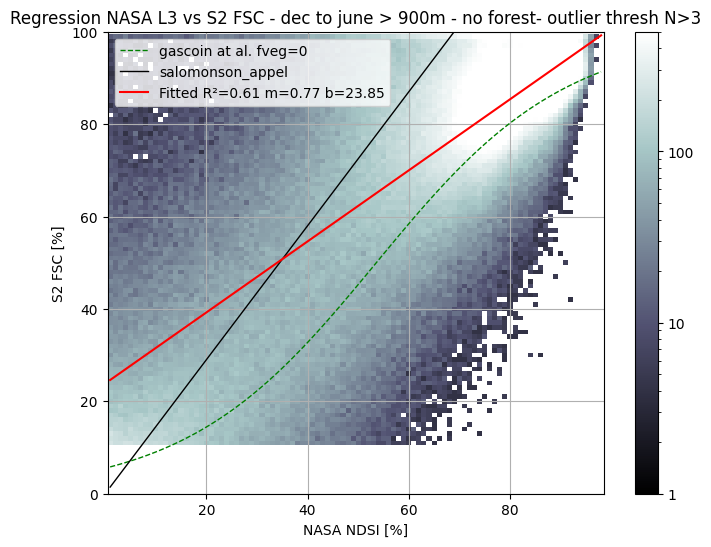

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
reduced_v = nasa_l3_ndsi_ds.sel(ref_bins=slice(1,99),test_bins=slice(1,99), time=slice('2023-12','2024-06'), altitude_bins=slice(900,None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']

xax = reduced_v.test_bins.values
fit_g = gascoin(xax*0.01, f_veg=0)*100
ax.plot(xax, fit_g,'g--', linewidth=1, label='gascoin at al. fveg=0')
ax.plot(xax, 1.45*xax-0.01, 'k', linewidth=1, label='salomonson_appel')
reduced_v = reduced_v.where(reduced_v>3,0)
scatter_plot = fancy_scatter_plot_ndsi(data_to_plt=reduced_v, ax=ax,figure=fig,gaussian_window_size=0)
ax.set_title('Regression NASA L3 vs S2 FSC - dec to june > 900m - no forest- outlier thresh N>3')
ax.set_ylabel("S2 FSC [%]")
ax.set_xlabel("NASA NDSI [%]")
ax.set_ylim(0,100)
ax.legend()

/tmp/ipykernel_20892/862620263.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.plot(regression_x_axis, regression_x_axis * coeff_slope + intercept,'--', color="gray",label=f"Fitted R²={score:.2f} m={float(coeff_slope):.2f} b={float(intercept):.2f}")


(0.0, 100.0)

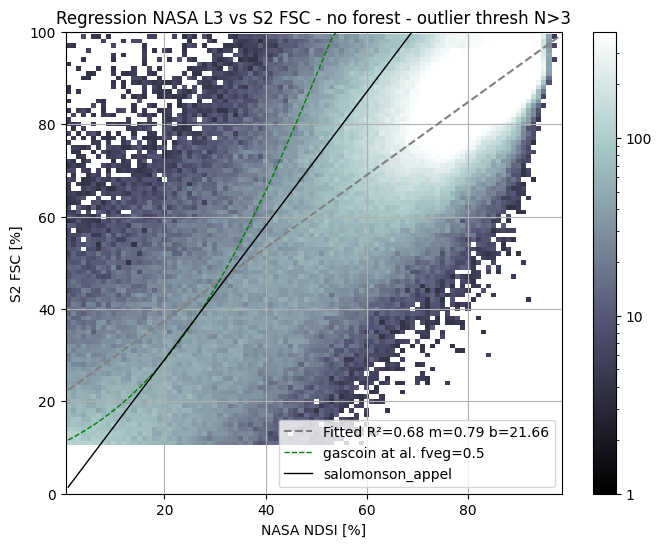

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
reduced_v = nasa_l3_ndsi_ds.sel(ref_bins=slice(1,99),forest_mask_bins=['no_forest'],test_bins=slice(1,99),time=slice('2023-12','2024-06'), altitude_bins=slice(900,None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
reduced_v = reduced_v.where(reduced_v>3,0)
scatter_plot = fancy_scatter_plot_ndsi(data_to_plt=reduced_v, ax=ax,figure=fig,gaussian_window_size=0)
xax = reduced_v.test_bins.values
fit_g = gascoin(xax*0.01, f_veg=0.5)*100
ax.plot(xax, fit_g,'g--', linewidth=1, label='gascoin at al. fveg=0.5')
ax.plot(xax, 1.45*xax-0.01, 'k', linewidth=1, label='salomonson_appel')
ax.legend()
ax.set_title('Regression NASA L3 vs S2 FSC - no forest - outlier thresh N>3')
ax.set_ylabel("S2 FSC [%]")
ax.set_xlabel("NASA NDSI [%]")
ax.set_ylim(0,100)

/tmp/ipykernel_8887/1524809254.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.plot(regression_x_axis, regression_x_axis * coeff_slope + intercept, color="r",label=f"Fitted R²={score:.2f} m={float(coeff_slope):.2f} b={float(intercept):.2f}")


(0.0, 100.0)

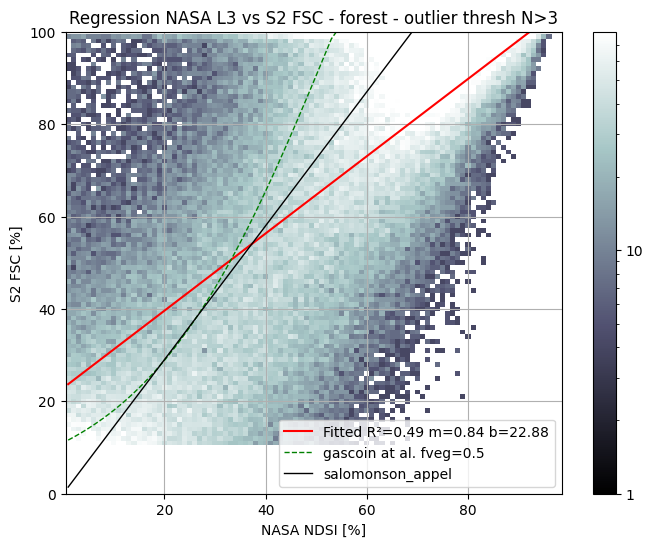

In [225]:
fig, ax = plt.subplots(figsize=(8, 6))
reduced_v = nasa_l3_ndsi_ds.sel(ref_bins=slice(1,99),forest_mask_bins=['forest'],test_bins=slice(1,99),time=slice('2023-12','2024-06'), altitude_bins=slice(900,None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
reduced_v = reduced_v.where(reduced_v>3,0)
scatter_plot = fancy_scatter_plot_ndsi(data_to_plt=reduced_v, ax=ax,figure=fig,gaussian_window_size=0)
fit_g = gascoin(xax*0.01, f_veg=0.5)*100
ax.plot(xax, fit_g,'g--', linewidth=1, label='gascoin at al. fveg=0.5')
ax.plot(xax, 1.45*xax-0.01, 'k', linewidth=1, label='salomonson_appel')
ax.legend()
ax.set_title('Regression NASA L3 vs S2 FSC - forest - outlier thresh N>3')
ax.set_ylabel("S2 FSC [%]")
ax.set_xlabel("NASA NDSI [%]")
ax.set_ylim(0,100)

/tmp/ipykernel_7322/862620263.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.plot(regression_x_axis, regression_x_axis * coeff_slope + intercept,'--', color="gray",label=f"Fitted R²={score:.2f} m={float(coeff_slope):.2f} b={float(intercept):.2f}")


(-100.0, 100.0)

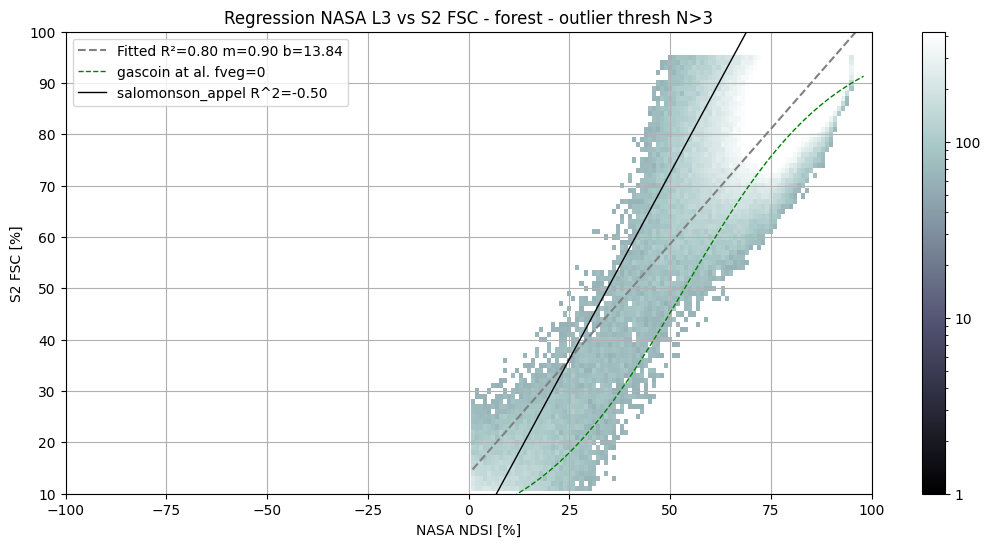

In [98]:
def fit_regression_ndsi(data_to_fit: xr.DataArray):
    test_grid, ref_grid = np.meshgrid(data_to_fit.test_bins.values, data_to_fit.ref_bins.values)
    model_x_data = ref_grid.reshape((-1, 1))
    model_y_data = test_grid.reshape((-1, 1))
    weights = data_to_fit.values.ravel()
    regression = LinearRegression().fit(X=model_y_data, y=model_x_data, sample_weight=weights)
    return (
        regression.coef_[0],
        regression.intercept_,
        regression.score(model_y_data, model_x_data, data_to_fit.values.ravel()),
    )

def salomonson_regr_score(data_to_fit: xr.DataArray):
    test_grid, ref_grid = np.meshgrid(data_to_fit.test_bins.values, data_to_fit.ref_bins.values)
    model_x_data = ref_grid.reshape((-1, 1))
    model_y_data = test_grid.reshape((-1, 1))
    salomonson_regr = LinearRegression().fit(X=np.arange(1,100).reshape(-1, 1),y=1.45*np.arange(1,100).reshape(-1, 1)-0.01)
    return salomonson_regr.score(model_y_data, model_x_data, data_to_fit.values.ravel()),
    


fig, ax = plt.subplots(figsize=(13, 6))
reduced_v = nasa_l3_ndsi_ds.sel(ref_bins=slice(10,95),test_bins=slice(1,99),time=slice('2023-12','2024-06'), altitude_bins=slice(900,None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
reduced_v = reduced_v.where(reduced_v>60,0)
# reduced_v = reduced_v[::3,::3]
scatter_plot = fancy_scatter_plot_ndsi(data_to_plt=reduced_v, ax=ax,figure=fig,gaussian_window_size=0)
xax = reduced_v.test_bins.values
fit_g = gascoin(xax*0.01, f_veg=0.)*100
salomonson_score = salomonson_regr_score(reduced_v)
ax.plot(xax, fit_g,'g--', linewidth=1, label='gascoin at al. fveg=0')
ax.plot(xax, 1.45*xax-0.01, 'k', linewidth=1, label=f"salomonson_appel R^2={salomonson_score[0]:.2f}")
ax.legend()
ax.set_title('Regression NASA L3 vs S2 FSC - forest - outlier thresh N>3')
ax.set_ylabel("S2 FSC [%]")
ax.set_xlabel("NASA NDSI [%]")
ax.set_ylim(10,100)
ax.set_xlim(-100,100)